In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [13]:
# 데이터 전처리                ############
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
from tqdm import tqdm
import random
import xgboost as xgb

In [14]:
path = "./table_v4"
dir_list = os.listdir(path)
dir_train = dir_list

dir_train.remove('val_7.csv')
dir_train.remove('val_8.csv')
dir_train.remove('table_202107_1_v4.csv')
dir_train.remove('table_202108_2_v4.csv')
dir_train.remove('table_202108_1_v4.csv')
dir_train.remove('table_202107_2_v4.csv')

In [15]:
train = pd.DataFrame()
for files in dir_train:
    df = pd.read_csv('./table_v4/'+files)
    train = pd.concat([train,df])

In [23]:
dir_test = ['val_7.csv','val_8.csv']
test = pd.DataFrame()
for files in dir_test:
    df = pd.read_csv('./table_v4/'+files)
    test = pd.concat([test,df])

In [24]:
dir_val = ['table_202107_1_v4.csv','table_202108_2_v4.csv']
val = pd.DataFrame()
for files in dir_val:
    df = pd.read_csv('./table_v4/'+files)
    val = pd.concat([val,df])

In [25]:
X_train_TA = train.drop(['YearMonthDayHourMinute', 'STN', 'Lon', 'Lat', 'isitu-LST',
       '30daysBand3', '30daysBand13', 'GK2A-LST',  'insitu-TED0.1', 'insitu-TED0.2',
       'insitu-TED0.3', 'insitu-TED0.5', 'insitu-TED1.0', 'insitu-TED1.5',
       'insitu-TED3.0', 'insitu-TED5.0', 'insitu-PA', 'insitu-PS', 'Year',
       'Month', 'Day', 'Hour', 'Minute',  'mean_34_37',
        'mean_43_44','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12','mean_6_23','mean_38_39','mean_40_42',
            'Band13','Band16','30daysBand3','30daysBand13','insitu-TA'], axis=1)
X_test_TA = test.drop(['YearMonthDayHourMinute', 'STN', 'Lon', 'Lat', 'isitu-LST',
       '30daysBand3', '30daysBand13', 'GK2A-LST',  'insitu-TED0.1', 'insitu-TED0.2',
       'insitu-TED0.3', 'insitu-TED0.5', 'insitu-TED1.0', 'insitu-TED1.5',
       'insitu-TED3.0', 'insitu-TED5.0', 'insitu-PA', 'insitu-PS', 'Year',
       'Month', 'Day', 'Hour', 'Minute',  'mean_34_37',
       'mean_43_44','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12','mean_6_23','mean_38_39','mean_40_42',
            'Band13','Band16','30daysBand3','30daysBand13','insitu-TA'], axis=1)


X_train_LST = train.drop(['YearMonthDayHourMinute', 'STN', 'Lon', 'Lat', 'isitu-LST',
       '30daysBand3', '30daysBand13', 'GK2A-LST',  'insitu-TED0.1', 'insitu-TED0.2',
       'insitu-TED0.3', 'insitu-TED0.5', 'insitu-TED1.0', 'insitu-TED1.5',
       'insitu-TED3.0', 'insitu-TED5.0', 'insitu-PA', 'insitu-PS', 'Year',
       'Month', 'Day', 'Hour', 'Minute',  'mean_34_37',
        'mean_43_44','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12','mean_6_23','mean_38_39','mean_40_42',
            'Band13','Band16','30daysBand3','30daysBand13'], axis=1)
X_test_LST = test.drop(['YearMonthDayHourMinute', 'STN', 'Lon', 'Lat', 'isitu-LST',
       '30daysBand3', '30daysBand13', 'GK2A-LST',  'insitu-TED0.1', 'insitu-TED0.2',
       'insitu-TED0.3', 'insitu-TED0.5', 'insitu-TED1.0', 'insitu-TED1.5',
       'insitu-TED3.0', 'insitu-TED5.0', 'insitu-PA', 'insitu-PS', 'Year',
       'Month', 'Day', 'Hour', 'Minute',  'mean_34_37',
       'mean_43_44','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12','mean_6_23','mean_38_39','mean_40_42',
            'Band13','Band16','30daysBand3','30daysBand13'], axis=1)

# y_train=train[['isitu-LST', 'insitu-TA','insitu-TED0.05']]
# y_test=val[['isitu-LST', 'insitu-TA','insitu-TED0.05']]
y_train_LST=train[['isitu-LST']].values
y_test_LST=test[['isitu-LST']].values
    
y_train_TA=train[['insitu-TA']].values
y_test_TA=test[['insitu-TA']].values

In [26]:
X_train

,Band1,Band14,Band15,SolarZA,SateZA,ESR,Height,LandType,insitu-HM,insitu-TD,insitu-TG,insitu-TED0.05,NDVI,NDWI
0,0.00000,283.29086,281.10048,162.63634,44.52481,-9.38141,17.53,2,30.3,-17.7,-4.2,-999.0,-0.333333,1.000000
1,-0.00057,257.36883,256.91597,162.17793,44.41427,-9.36082,155.48,2,64.1,-14.5,-7.9,-999.0,3.000000,-0.310345
2,0.00000,257.69321,257.16449,162.27711,44.13104,-9.36664,115.62,2,58.4,-14.7,-7.4,-999.0,0.333333,1.000000
3,-0.00057,258.01635,257.58363,162.14729,44.12316,-9.36060,30.59,2,52.8,-15.4,-6.5,-999.0,-3.000000,-1.000000
4,-0.00057,261.56559,260.91113,162.57755,44.12761,-9.38050,75.82,3,66.0,-14.3,-14.1,-0.5,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266775,0.00000,279.46558,276.35881,129.94025,42.59904,-5.55006,88.62,2,98.0,20.6,20.6,27.8,-0.536082,1.000000
266776,0.00000,260.92599,259.20516,131.08437,41.10588,-5.67084,16.78,2,94.4,20.7,-999.0,26.2,1.000000,1.000000
266777,0.00057,269.62479,266.77284,129.50209,42.79873,-5.46819,40.35,2,98.3,23.1,25.7,28.0,-1.666667,-1.000000
266778,0.00000,274.13515,270.22871,128.39204,44.18884,-5.34326,140.37,2,85.2,19.4,20.5,27.5,-3.000000,1.000000


# TA train

In [29]:
xgb_modelv4_TA = xgb.XGBRegressor(n_estimators = 2500, learning_rate = 0.017, \
                                  max_depth=11, subsample=0.5,colsample_bytree=0.7,  \
                        random_state = 2000).fit(X_train_TA,y_train_TA, eval_set=[(X_test_TA, y_test_TA)], \
                                                          early_stopping_rounds=15)

[0]	validation_0-rmse:25.69449
[1]	validation_0-rmse:25.25869
[2]	validation_0-rmse:24.83030
[3]	validation_0-rmse:24.40894
[4]	validation_0-rmse:24.00677
[5]	validation_0-rmse:23.61865
[6]	validation_0-rmse:23.21807
[7]	validation_0-rmse:22.82418
[8]	validation_0-rmse:22.45462
[9]	validation_0-rmse:22.07324
[10]	validation_0-rmse:21.71645
[11]	validation_0-rmse:21.36503
[12]	validation_0-rmse:21.00229
[13]	validation_0-rmse:20.64576
[14]	validation_0-rmse:20.30255
[15]	validation_0-rmse:19.95792
[16]	validation_0-rmse:19.63559
[17]	validation_0-rmse:19.30907
[18]	validation_0-rmse:18.99674
[19]	validation_0-rmse:18.68990
[20]	validation_0-rmse:18.38275
[21]	validation_0-rmse:18.07060
[22]	validation_0-rmse:17.76981
[23]	validation_0-rmse:17.48662
[24]	validation_0-rmse:17.18972
[25]	validation_0-rmse:16.90765
[26]	validation_0-rmse:16.62712
[27]	validation_0-rmse:16.35468
[28]	validation_0-rmse:16.08355
[29]	validation_0-rmse:15.88209
[30]	validation_0-rmse:15.61250
[31]	validation_0-

[258]	validation_0-rmse:0.61213
[259]	validation_0-rmse:0.60837
[260]	validation_0-rmse:0.60126
[261]	validation_0-rmse:0.59782
[262]	validation_0-rmse:0.59299
[263]	validation_0-rmse:0.58608
[264]	validation_0-rmse:0.58348
[265]	validation_0-rmse:0.58033
[266]	validation_0-rmse:0.57571
[267]	validation_0-rmse:0.57135
[268]	validation_0-rmse:0.56678
[269]	validation_0-rmse:0.56376
[270]	validation_0-rmse:0.56096
[271]	validation_0-rmse:0.55692
[272]	validation_0-rmse:0.55150
[273]	validation_0-rmse:0.54756
[274]	validation_0-rmse:0.54169
[275]	validation_0-rmse:0.53610
[276]	validation_0-rmse:0.53230
[277]	validation_0-rmse:0.52857
[278]	validation_0-rmse:0.52328
[279]	validation_0-rmse:0.52097
[280]	validation_0-rmse:0.51868
[281]	validation_0-rmse:0.51409
[282]	validation_0-rmse:0.51067
[283]	validation_0-rmse:0.50575
[284]	validation_0-rmse:0.50144
[285]	validation_0-rmse:0.49718
[286]	validation_0-rmse:0.49409
[287]	validation_0-rmse:0.49116
[288]	validation_0-rmse:0.48648
[289]	va

[515]	validation_0-rmse:0.26780
[516]	validation_0-rmse:0.26757
[517]	validation_0-rmse:0.26733
[518]	validation_0-rmse:0.26719
[519]	validation_0-rmse:0.26681
[520]	validation_0-rmse:0.26665
[521]	validation_0-rmse:0.26613
[522]	validation_0-rmse:0.26530
[523]	validation_0-rmse:0.26521
[524]	validation_0-rmse:0.26473
[525]	validation_0-rmse:0.26426
[526]	validation_0-rmse:0.26404
[527]	validation_0-rmse:0.26328
[528]	validation_0-rmse:0.26225
[529]	validation_0-rmse:0.26215
[530]	validation_0-rmse:0.26195
[531]	validation_0-rmse:0.26174
[532]	validation_0-rmse:0.26150
[533]	validation_0-rmse:0.26137
[534]	validation_0-rmse:0.26126
[535]	validation_0-rmse:0.26038
[536]	validation_0-rmse:0.25994
[537]	validation_0-rmse:0.25896
[538]	validation_0-rmse:0.25882
[539]	validation_0-rmse:0.25868
[540]	validation_0-rmse:0.25861
[541]	validation_0-rmse:0.25845
[542]	validation_0-rmse:0.25760
[543]	validation_0-rmse:0.25720
[544]	validation_0-rmse:0.25640
[545]	validation_0-rmse:0.25632
[546]	va

[772]	validation_0-rmse:0.20077
[773]	validation_0-rmse:0.20033
[774]	validation_0-rmse:0.20025
[775]	validation_0-rmse:0.19983
[776]	validation_0-rmse:0.19978
[777]	validation_0-rmse:0.19963
[778]	validation_0-rmse:0.19947
[779]	validation_0-rmse:0.19933
[780]	validation_0-rmse:0.19923
[781]	validation_0-rmse:0.19906
[782]	validation_0-rmse:0.19864
[783]	validation_0-rmse:0.19823
[784]	validation_0-rmse:0.19806
[785]	validation_0-rmse:0.19799
[786]	validation_0-rmse:0.19775
[787]	validation_0-rmse:0.19756
[788]	validation_0-rmse:0.19752
[789]	validation_0-rmse:0.19717
[790]	validation_0-rmse:0.19711
[791]	validation_0-rmse:0.19702
[792]	validation_0-rmse:0.19696
[793]	validation_0-rmse:0.19689
[794]	validation_0-rmse:0.19651
[795]	validation_0-rmse:0.19641
[796]	validation_0-rmse:0.19634
[797]	validation_0-rmse:0.19626
[798]	validation_0-rmse:0.19620
[799]	validation_0-rmse:0.19614
[800]	validation_0-rmse:0.19594
[801]	validation_0-rmse:0.19585
[802]	validation_0-rmse:0.19558
[803]	va

[1028]	validation_0-rmse:0.16802
[1029]	validation_0-rmse:0.16798
[1030]	validation_0-rmse:0.16796
[1031]	validation_0-rmse:0.16782
[1032]	validation_0-rmse:0.16779
[1033]	validation_0-rmse:0.16766
[1034]	validation_0-rmse:0.16754
[1035]	validation_0-rmse:0.16743
[1036]	validation_0-rmse:0.16735
[1037]	validation_0-rmse:0.16727
[1038]	validation_0-rmse:0.16720
[1039]	validation_0-rmse:0.16709
[1040]	validation_0-rmse:0.16705
[1041]	validation_0-rmse:0.16700
[1042]	validation_0-rmse:0.16696
[1043]	validation_0-rmse:0.16683
[1044]	validation_0-rmse:0.16677
[1045]	validation_0-rmse:0.16671
[1046]	validation_0-rmse:0.16658
[1047]	validation_0-rmse:0.16650
[1048]	validation_0-rmse:0.16641
[1049]	validation_0-rmse:0.16630
[1050]	validation_0-rmse:0.16625
[1051]	validation_0-rmse:0.16620
[1052]	validation_0-rmse:0.16617
[1053]	validation_0-rmse:0.16612
[1054]	validation_0-rmse:0.16607
[1055]	validation_0-rmse:0.16600
[1056]	validation_0-rmse:0.16592
[1057]	validation_0-rmse:0.16581
[1058]	val

[1277]	validation_0-rmse:0.14919
[1278]	validation_0-rmse:0.14903
[1279]	validation_0-rmse:0.14896
[1280]	validation_0-rmse:0.14893
[1281]	validation_0-rmse:0.14889
[1282]	validation_0-rmse:0.14885
[1283]	validation_0-rmse:0.14872
[1284]	validation_0-rmse:0.14868
[1285]	validation_0-rmse:0.14859
[1286]	validation_0-rmse:0.14848
[1287]	validation_0-rmse:0.14845
[1288]	validation_0-rmse:0.14841
[1289]	validation_0-rmse:0.14838
[1290]	validation_0-rmse:0.14835
[1291]	validation_0-rmse:0.14823
[1292]	validation_0-rmse:0.14820
[1293]	validation_0-rmse:0.14816
[1294]	validation_0-rmse:0.14811
[1295]	validation_0-rmse:0.14807
[1296]	validation_0-rmse:0.14802
[1297]	validation_0-rmse:0.14801
[1298]	validation_0-rmse:0.14797
[1299]	validation_0-rmse:0.14793
[1300]	validation_0-rmse:0.14785
[1301]	validation_0-rmse:0.14780
[1302]	validation_0-rmse:0.14769
[1303]	validation_0-rmse:0.14763
[1304]	validation_0-rmse:0.14760
[1305]	validation_0-rmse:0.14756
[1306]	validation_0-rmse:0.14753
[1307]	val

[1526]	validation_0-rmse:0.13777
[1527]	validation_0-rmse:0.13775
[1528]	validation_0-rmse:0.13767
[1529]	validation_0-rmse:0.13764
[1530]	validation_0-rmse:0.13762
[1531]	validation_0-rmse:0.13752
[1532]	validation_0-rmse:0.13751
[1533]	validation_0-rmse:0.13741
[1534]	validation_0-rmse:0.13738
[1535]	validation_0-rmse:0.13728
[1536]	validation_0-rmse:0.13726
[1537]	validation_0-rmse:0.13723
[1538]	validation_0-rmse:0.13718
[1539]	validation_0-rmse:0.13715
[1540]	validation_0-rmse:0.13708
[1541]	validation_0-rmse:0.13705
[1542]	validation_0-rmse:0.13699
[1543]	validation_0-rmse:0.13696
[1544]	validation_0-rmse:0.13690
[1545]	validation_0-rmse:0.13689
[1546]	validation_0-rmse:0.13686
[1547]	validation_0-rmse:0.13681
[1548]	validation_0-rmse:0.13679
[1549]	validation_0-rmse:0.13677
[1550]	validation_0-rmse:0.13667
[1551]	validation_0-rmse:0.13660
[1552]	validation_0-rmse:0.13657
[1553]	validation_0-rmse:0.13655
[1554]	validation_0-rmse:0.13651
[1555]	validation_0-rmse:0.13649
[1556]	val

[1775]	validation_0-rmse:0.12896
[1776]	validation_0-rmse:0.12894
[1777]	validation_0-rmse:0.12889
[1778]	validation_0-rmse:0.12887
[1779]	validation_0-rmse:0.12884
[1780]	validation_0-rmse:0.12879
[1781]	validation_0-rmse:0.12873
[1782]	validation_0-rmse:0.12872
[1783]	validation_0-rmse:0.12870
[1784]	validation_0-rmse:0.12869
[1785]	validation_0-rmse:0.12864
[1786]	validation_0-rmse:0.12857
[1787]	validation_0-rmse:0.12855
[1788]	validation_0-rmse:0.12851
[1789]	validation_0-rmse:0.12850
[1790]	validation_0-rmse:0.12847
[1791]	validation_0-rmse:0.12846
[1792]	validation_0-rmse:0.12844
[1793]	validation_0-rmse:0.12842
[1794]	validation_0-rmse:0.12841
[1795]	validation_0-rmse:0.12839
[1796]	validation_0-rmse:0.12834
[1797]	validation_0-rmse:0.12832
[1798]	validation_0-rmse:0.12828
[1799]	validation_0-rmse:0.12827
[1800]	validation_0-rmse:0.12825
[1801]	validation_0-rmse:0.12822
[1802]	validation_0-rmse:0.12820
[1803]	validation_0-rmse:0.12816
[1804]	validation_0-rmse:0.12813
[1805]	val

[2024]	validation_0-rmse:0.12248
[2025]	validation_0-rmse:0.12246
[2026]	validation_0-rmse:0.12245
[2027]	validation_0-rmse:0.12243
[2028]	validation_0-rmse:0.12239
[2029]	validation_0-rmse:0.12235
[2030]	validation_0-rmse:0.12234
[2031]	validation_0-rmse:0.12233
[2032]	validation_0-rmse:0.12232
[2033]	validation_0-rmse:0.12230
[2034]	validation_0-rmse:0.12227
[2035]	validation_0-rmse:0.12226
[2036]	validation_0-rmse:0.12224
[2037]	validation_0-rmse:0.12223
[2038]	validation_0-rmse:0.12219
[2039]	validation_0-rmse:0.12217
[2040]	validation_0-rmse:0.12212
[2041]	validation_0-rmse:0.12211
[2042]	validation_0-rmse:0.12209
[2043]	validation_0-rmse:0.12207
[2044]	validation_0-rmse:0.12205
[2045]	validation_0-rmse:0.12204
[2046]	validation_0-rmse:0.12202
[2047]	validation_0-rmse:0.12201
[2048]	validation_0-rmse:0.12200
[2049]	validation_0-rmse:0.12198
[2050]	validation_0-rmse:0.12196
[2051]	validation_0-rmse:0.12195
[2052]	validation_0-rmse:0.12192
[2053]	validation_0-rmse:0.12190
[2054]	val

[2273]	validation_0-rmse:0.11776
[2274]	validation_0-rmse:0.11775
[2275]	validation_0-rmse:0.11774
[2276]	validation_0-rmse:0.11773
[2277]	validation_0-rmse:0.11772
[2278]	validation_0-rmse:0.11771
[2279]	validation_0-rmse:0.11769
[2280]	validation_0-rmse:0.11766
[2281]	validation_0-rmse:0.11765
[2282]	validation_0-rmse:0.11764
[2283]	validation_0-rmse:0.11763
[2284]	validation_0-rmse:0.11763
[2285]	validation_0-rmse:0.11762
[2286]	validation_0-rmse:0.11759
[2287]	validation_0-rmse:0.11756
[2288]	validation_0-rmse:0.11753
[2289]	validation_0-rmse:0.11752
[2290]	validation_0-rmse:0.11750
[2291]	validation_0-rmse:0.11749
[2292]	validation_0-rmse:0.11747
[2293]	validation_0-rmse:0.11745
[2294]	validation_0-rmse:0.11744
[2295]	validation_0-rmse:0.11742
[2296]	validation_0-rmse:0.11740
[2297]	validation_0-rmse:0.11738
[2298]	validation_0-rmse:0.11737
[2299]	validation_0-rmse:0.11736
[2300]	validation_0-rmse:0.11735
[2301]	validation_0-rmse:0.11733
[2302]	validation_0-rmse:0.11732
[2303]	val

Text(0.5, 1.0, 'Feature Importance')

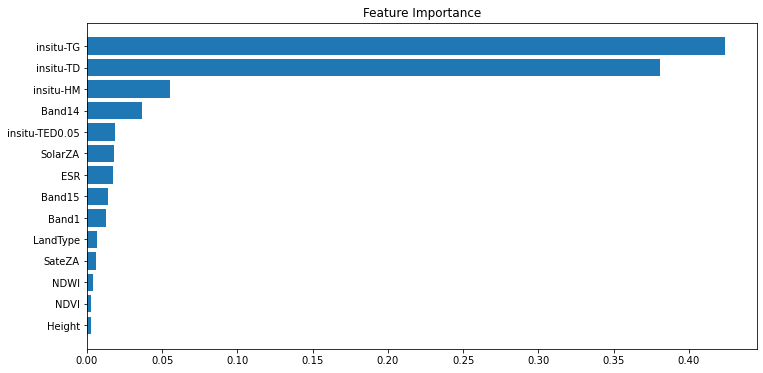

In [30]:
feature_importance = xgb_modelv4_TA.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test_TA.columns)[sorted_idx])
plt.title('Feature Importance')

In [31]:
filename = 'xgb_modelv4_TA.model'
xgb_modelv4_TA.save_model(filename) #save

In [32]:
# 모델 불러오기
new_xgb_modelv4_TA = xgb.XGBRegressor() # 모델 초기화
new_xgb_modelv4_TA.load_model(filename) # 모델 불러오기

In [33]:
from sklearn.metrics import mean_squared_error

preds =new_xgb_modelv4_TA.predict(X_test_TA)
mse = mean_squared_error(y_test_TA, preds)
print("MSE: %f" % (mse))

MSE: 0.013093


In [38]:
# import matplotlib.pyplot as plt


# ta_pr_TA = []
# for i in range(len(preds)):
#     ta_pr_TA.append(preds)
    
# ta_re_TA = []
# for i in range(len(y_test_TA)):
#     ta_re_TA.append(y_test_TA)
    

# plt.plot(ta_pr_TA[700:750], color = 'r', label = 'pred')
# plt.plot(ta_re_TA[700:750], color = 'black', label = 'real')
# plt.ylabel('TA')
# plt.legend()
# plt.show()  

In [39]:
val_ = val.drop(['YearMonthDayHourMinute', 'STN', 'Lon', 'Lat',
       '30daysBand3', '30daysBand13', 'GK2A-LST',  'insitu-TED0.1', 'insitu-TED0.2',
       'insitu-TED0.3', 'insitu-TED0.5', 'insitu-TED1.0', 'insitu-TED1.5',
       'insitu-TED3.0', 'insitu-TED5.0', 'insitu-PA', 'insitu-PS', 'Year',
       'Month', 'Day', 'Hour', 'Minute',  'mean_34_37',
       'mean_43_44','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12','mean_6_23','mean_38_39','mean_40_42'
            ,'Band13','Band16','30daysBand3','30daysBand13'], axis=1)

pred_TA =new_xgb_modelv4_TA.predict(val_)
val_['insitu-TA'] = pred_TA      # 피쳐 생성
pred_TA

array([20.900202, 20.60835 , 19.146776, ..., 20.431067, 17.53674 ,
       24.17766 ], dtype=float32)

# LST train

In [40]:
xgb_modelv4_LST = xgb.XGBRegressor(n_estimators = 2500, learning_rate = 0.017, \
                                  max_depth=11, subsample=0.5,colsample_bytree=0.7,  \
                        random_state = 2000).fit(X_train_LST,y_train_LST, eval_set=[(X_test_LST, y_test_LST)], \
                                                          early_stopping_rounds=15)

C:\Users\younjeongOh\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:30.55864
[1]	validation_0-rmse:30.05314
[2]	validation_0-rmse:29.55705
[3]	validation_0-rmse:29.07437
[4]	validation_0-rmse:28.59909
[5]	validation_0-rmse:28.12962
[6]	validation_0-rmse:27.66810
[7]	validation_0-rmse:27.21078
[8]	validation_0-rmse:26.76406
[9]	validation_0-rmse:26.32644
[10]	validation_0-rmse:25.89351
[11]	validation_0-rmse:25.46748
[12]	validation_0-rmse:25.05299
[13]	validation_0-rmse:24.64402
[14]	validation_0-rmse:24.24221
[15]	validation_0-rmse:23.84601
[16]	validation_0-rmse:23.46015
[17]	validation_0-rmse:23.07629
[18]	validation_0-rmse:22.75465
[19]	validation_0-rmse:22.38078
[20]	validation_0-rmse:22.01331
[21]	validation_0-rmse:21.65624
[22]	validation_0-rmse:21.31024
[23]	validation_0-rmse:20.96443
[24]	validation_0-rmse:20.62696
[25]	validation_0-rmse:20.29303
[26]	validation_0-rmse:19.96674
[27]	validation_0-rmse:19.64259
[28]	validation_0-rmse:19.32352
[29]	validation_0-rmse:19.00921
[30]	validation_0-rmse:18.70268
[31]	validation_0-

[258]	validation_0-rmse:2.31146
[259]	validation_0-rmse:2.30773
[260]	validation_0-rmse:2.30418
[261]	validation_0-rmse:2.30105
[262]	validation_0-rmse:2.29787
[263]	validation_0-rmse:2.29501
[264]	validation_0-rmse:2.29168
[265]	validation_0-rmse:2.28888
[266]	validation_0-rmse:2.28567
[267]	validation_0-rmse:2.28281
[268]	validation_0-rmse:2.27952
[269]	validation_0-rmse:2.27651
[270]	validation_0-rmse:2.27418
[271]	validation_0-rmse:2.27113
[272]	validation_0-rmse:2.26898
[273]	validation_0-rmse:2.26624
[274]	validation_0-rmse:2.26359
[275]	validation_0-rmse:2.26065
[276]	validation_0-rmse:2.25770
[277]	validation_0-rmse:2.25556
[278]	validation_0-rmse:2.25279
[279]	validation_0-rmse:2.25016
[280]	validation_0-rmse:2.24821
[281]	validation_0-rmse:2.24575
[282]	validation_0-rmse:2.24323
[283]	validation_0-rmse:2.24143
[284]	validation_0-rmse:2.23923
[285]	validation_0-rmse:2.23728
[286]	validation_0-rmse:2.23560
[287]	validation_0-rmse:2.23367
[288]	validation_0-rmse:2.23143
[289]	va

[515]	validation_0-rmse:2.02610
[516]	validation_0-rmse:2.02525
[517]	validation_0-rmse:2.02462
[518]	validation_0-rmse:2.02417
[519]	validation_0-rmse:2.02368
[520]	validation_0-rmse:2.02339
[521]	validation_0-rmse:2.02323
[522]	validation_0-rmse:2.02288
[523]	validation_0-rmse:2.02203
[524]	validation_0-rmse:2.02187
[525]	validation_0-rmse:2.02113
[526]	validation_0-rmse:2.02088
[527]	validation_0-rmse:2.02003
[528]	validation_0-rmse:2.01915
[529]	validation_0-rmse:2.01888
[530]	validation_0-rmse:2.01858
[531]	validation_0-rmse:2.01797
[532]	validation_0-rmse:2.01771
[533]	validation_0-rmse:2.01712
[534]	validation_0-rmse:2.01707
[535]	validation_0-rmse:2.01666
[536]	validation_0-rmse:2.01641
[537]	validation_0-rmse:2.01587
[538]	validation_0-rmse:2.01530
[539]	validation_0-rmse:2.01499
[540]	validation_0-rmse:2.01452
[541]	validation_0-rmse:2.01442
[542]	validation_0-rmse:2.01374
[543]	validation_0-rmse:2.01306
[544]	validation_0-rmse:2.01266
[545]	validation_0-rmse:2.01216
[546]	va

[772]	validation_0-rmse:1.94294
[773]	validation_0-rmse:1.94260
[774]	validation_0-rmse:1.94230
[775]	validation_0-rmse:1.94205
[776]	validation_0-rmse:1.94179
[777]	validation_0-rmse:1.94143
[778]	validation_0-rmse:1.94079
[779]	validation_0-rmse:1.94059
[780]	validation_0-rmse:1.94007
[781]	validation_0-rmse:1.94001
[782]	validation_0-rmse:1.93987
[783]	validation_0-rmse:1.93962
[784]	validation_0-rmse:1.93939
[785]	validation_0-rmse:1.93923
[786]	validation_0-rmse:1.93874
[787]	validation_0-rmse:1.93868
[788]	validation_0-rmse:1.93867
[789]	validation_0-rmse:1.93858
[790]	validation_0-rmse:1.93833
[791]	validation_0-rmse:1.93820
[792]	validation_0-rmse:1.93807
[793]	validation_0-rmse:1.93780
[794]	validation_0-rmse:1.93744
[795]	validation_0-rmse:1.93721
[796]	validation_0-rmse:1.93699
[797]	validation_0-rmse:1.93640
[798]	validation_0-rmse:1.93629
[799]	validation_0-rmse:1.93611
[800]	validation_0-rmse:1.93571
[801]	validation_0-rmse:1.93538
[802]	validation_0-rmse:1.93486
[803]	va

[1028]	validation_0-rmse:1.88611
[1029]	validation_0-rmse:1.88590
[1030]	validation_0-rmse:1.88548
[1031]	validation_0-rmse:1.88542
[1032]	validation_0-rmse:1.88513
[1033]	validation_0-rmse:1.88504
[1034]	validation_0-rmse:1.88452
[1035]	validation_0-rmse:1.88416
[1036]	validation_0-rmse:1.88400
[1037]	validation_0-rmse:1.88360
[1038]	validation_0-rmse:1.88343
[1039]	validation_0-rmse:1.88343
[1040]	validation_0-rmse:1.88318
[1041]	validation_0-rmse:1.88292
[1042]	validation_0-rmse:1.88260
[1043]	validation_0-rmse:1.88200
[1044]	validation_0-rmse:1.88184
[1045]	validation_0-rmse:1.88172
[1046]	validation_0-rmse:1.88145
[1047]	validation_0-rmse:1.88099
[1048]	validation_0-rmse:1.88065
[1049]	validation_0-rmse:1.88046
[1050]	validation_0-rmse:1.88037
[1051]	validation_0-rmse:1.88023
[1052]	validation_0-rmse:1.88010
[1053]	validation_0-rmse:1.87989
[1054]	validation_0-rmse:1.87949
[1055]	validation_0-rmse:1.87916
[1056]	validation_0-rmse:1.87883
[1057]	validation_0-rmse:1.87862
[1058]	val

[1277]	validation_0-rmse:1.83915
[1278]	validation_0-rmse:1.83904
[1279]	validation_0-rmse:1.83898
[1280]	validation_0-rmse:1.83857
[1281]	validation_0-rmse:1.83808
[1282]	validation_0-rmse:1.83799
[1283]	validation_0-rmse:1.83796
[1284]	validation_0-rmse:1.83756
[1285]	validation_0-rmse:1.83725
[1286]	validation_0-rmse:1.83720
[1287]	validation_0-rmse:1.83700
[1288]	validation_0-rmse:1.83665
[1289]	validation_0-rmse:1.83656
[1290]	validation_0-rmse:1.83635
[1291]	validation_0-rmse:1.83606
[1292]	validation_0-rmse:1.83584
[1293]	validation_0-rmse:1.83567
[1294]	validation_0-rmse:1.83550
[1295]	validation_0-rmse:1.83544
[1296]	validation_0-rmse:1.83523
[1297]	validation_0-rmse:1.83490
[1298]	validation_0-rmse:1.83466
[1299]	validation_0-rmse:1.83466
[1300]	validation_0-rmse:1.83459
[1301]	validation_0-rmse:1.83438
[1302]	validation_0-rmse:1.83416
[1303]	validation_0-rmse:1.83405
[1304]	validation_0-rmse:1.83398
[1305]	validation_0-rmse:1.83390
[1306]	validation_0-rmse:1.83381
[1307]	val

[1526]	validation_0-rmse:1.80245
[1527]	validation_0-rmse:1.80238
[1528]	validation_0-rmse:1.80205
[1529]	validation_0-rmse:1.80183
[1530]	validation_0-rmse:1.80181
[1531]	validation_0-rmse:1.80179
[1532]	validation_0-rmse:1.80172
[1533]	validation_0-rmse:1.80151
[1534]	validation_0-rmse:1.80149
[1535]	validation_0-rmse:1.80132
[1536]	validation_0-rmse:1.80111
[1537]	validation_0-rmse:1.80097
[1538]	validation_0-rmse:1.80079
[1539]	validation_0-rmse:1.80072
[1540]	validation_0-rmse:1.80071
[1541]	validation_0-rmse:1.80056
[1542]	validation_0-rmse:1.80039
[1543]	validation_0-rmse:1.80034
[1544]	validation_0-rmse:1.79991
[1545]	validation_0-rmse:1.79974
[1546]	validation_0-rmse:1.79972
[1547]	validation_0-rmse:1.79972
[1548]	validation_0-rmse:1.79962
[1549]	validation_0-rmse:1.79949
[1550]	validation_0-rmse:1.79944
[1551]	validation_0-rmse:1.79933
[1552]	validation_0-rmse:1.79931
[1553]	validation_0-rmse:1.79929
[1554]	validation_0-rmse:1.79927
[1555]	validation_0-rmse:1.79922
[1556]	val

[1775]	validation_0-rmse:1.77179
[1776]	validation_0-rmse:1.77168
[1777]	validation_0-rmse:1.77166
[1778]	validation_0-rmse:1.77162
[1779]	validation_0-rmse:1.77159
[1780]	validation_0-rmse:1.77149
[1781]	validation_0-rmse:1.77143
[1782]	validation_0-rmse:1.77131
[1783]	validation_0-rmse:1.77118
[1784]	validation_0-rmse:1.77108
[1785]	validation_0-rmse:1.77084
[1786]	validation_0-rmse:1.77070
[1787]	validation_0-rmse:1.77052
[1788]	validation_0-rmse:1.77041
[1789]	validation_0-rmse:1.77030
[1790]	validation_0-rmse:1.77017
[1791]	validation_0-rmse:1.76992
[1792]	validation_0-rmse:1.76992
[1793]	validation_0-rmse:1.76990
[1794]	validation_0-rmse:1.76982
[1795]	validation_0-rmse:1.76983
[1796]	validation_0-rmse:1.76972
[1797]	validation_0-rmse:1.76954
[1798]	validation_0-rmse:1.76941
[1799]	validation_0-rmse:1.76937
[1800]	validation_0-rmse:1.76927
[1801]	validation_0-rmse:1.76914
[1802]	validation_0-rmse:1.76911
[1803]	validation_0-rmse:1.76904
[1804]	validation_0-rmse:1.76901
[1805]	val

[2024]	validation_0-rmse:1.74369
[2025]	validation_0-rmse:1.74332
[2026]	validation_0-rmse:1.74326
[2027]	validation_0-rmse:1.74324
[2028]	validation_0-rmse:1.74310
[2029]	validation_0-rmse:1.74298
[2030]	validation_0-rmse:1.74285
[2031]	validation_0-rmse:1.74277
[2032]	validation_0-rmse:1.74263
[2033]	validation_0-rmse:1.74252
[2034]	validation_0-rmse:1.74247
[2035]	validation_0-rmse:1.74246
[2036]	validation_0-rmse:1.74232
[2037]	validation_0-rmse:1.74221
[2038]	validation_0-rmse:1.74217
[2039]	validation_0-rmse:1.74206
[2040]	validation_0-rmse:1.74201
[2041]	validation_0-rmse:1.74197
[2042]	validation_0-rmse:1.74184
[2043]	validation_0-rmse:1.74173
[2044]	validation_0-rmse:1.74167
[2045]	validation_0-rmse:1.74155
[2046]	validation_0-rmse:1.74134
[2047]	validation_0-rmse:1.74105
[2048]	validation_0-rmse:1.74090
[2049]	validation_0-rmse:1.74087
[2050]	validation_0-rmse:1.74072
[2051]	validation_0-rmse:1.74070
[2052]	validation_0-rmse:1.74068
[2053]	validation_0-rmse:1.74058
[2054]	val

[2273]	validation_0-rmse:1.72077
[2274]	validation_0-rmse:1.72053
[2275]	validation_0-rmse:1.72041
[2276]	validation_0-rmse:1.72037
[2277]	validation_0-rmse:1.72025
[2278]	validation_0-rmse:1.72023
[2279]	validation_0-rmse:1.72020
[2280]	validation_0-rmse:1.72006
[2281]	validation_0-rmse:1.71991
[2282]	validation_0-rmse:1.71991
[2283]	validation_0-rmse:1.71981
[2284]	validation_0-rmse:1.71962
[2285]	validation_0-rmse:1.71960
[2286]	validation_0-rmse:1.71958
[2287]	validation_0-rmse:1.71952
[2288]	validation_0-rmse:1.71951
[2289]	validation_0-rmse:1.71931
[2290]	validation_0-rmse:1.71924
[2291]	validation_0-rmse:1.71925
[2292]	validation_0-rmse:1.71909
[2293]	validation_0-rmse:1.71895
[2294]	validation_0-rmse:1.71894
[2295]	validation_0-rmse:1.71885
[2296]	validation_0-rmse:1.71877
[2297]	validation_0-rmse:1.71866
[2298]	validation_0-rmse:1.71838
[2299]	validation_0-rmse:1.71828
[2300]	validation_0-rmse:1.71818
[2301]	validation_0-rmse:1.71811
[2302]	validation_0-rmse:1.71804
[2303]	val

Text(0.5, 1.0, 'Feature Importance')

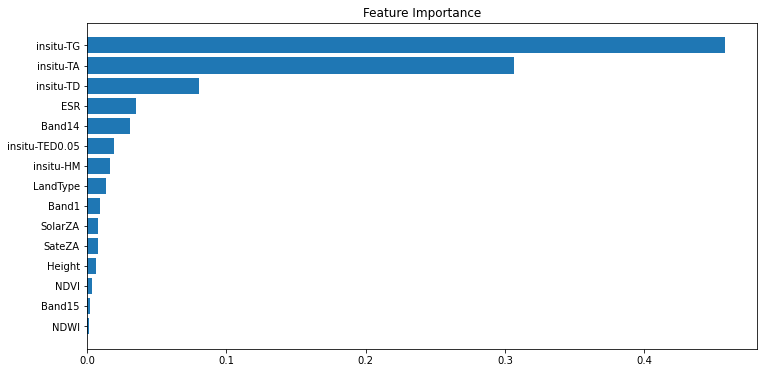

In [41]:
feature_importance = xgb_modelv4_LST.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test_LST.columns)[sorted_idx])
plt.title('Feature Importance')

In [42]:
filename = 'xgb_modelv4_LST.model'
xgb_modelv4_LST.save_model(filename) #save

# 모델 불러오기
new_xgb_modelv4_LST = xgb.XGBRegressor() # 모델 초기화
new_xgb_modelv4_LST.load_model(filename) # 모델 불러오기

preds =new_xgb_modelv4_LST.predict(X_test_LST)
mse = mean_squared_error(y_test_LST, preds)
print("MSE: %f" % (mse))

MSE: 2.895989


In [43]:
# ta_pr_LST = []
# for i in range(len(preds)):
#     ta_pr_LST.append(preds)
    
# ta_re_LST = []
# for i in range(len(y_test_LST)):
#     ta_re_LST.append(y_test_LST)
    
# def value_compare()
# #   plt.subplot(212)
#   plt.plot(ta_pr_LST[700:750], color = 'r', label = 'pred')
#   plt.plot(ta_re_LST[700:750], color = 'black', label = 'real')
#   plt.ylabel('LST')
#   plt.legend()
#   plt.show()  

# value_compare()

In [44]:
pred_LST =new_xgb_modelv4_LST.predict(val_)
pred_LST

array([18.02523 , 22.623896, 20.132345, ..., 21.877186, 18.732819,
       28.981745], dtype=float32)

In [46]:
submission=pd.read_csv('./1-2_검증데이터셋.csv', encoding='utf-8')
submission['isitu-LST'] = pred_LST
submission['insitu-TA'] = pred_TA
submission.to_csv("xgb_trans_v2_220224.csv", index = False)
submission

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,18.025230,20.900202
1,202107010030,93,22.623896,20.608351
2,202107010030,95,20.132345,19.146776
3,202107010030,98,31.721436,19.737118
4,202107010030,99,23.330822,20.216476
...,...,...,...,...
54498,202108312330,973,21.947697,24.093241
54499,202108312330,974,20.709091,23.962481
54500,202108312330,977,21.877186,20.431067
54501,202108312330,978,18.732819,17.536739


In [ ]:
################

In [20]:
mask5 = test_['insitu-TED0.05'].isin([-999])
test_no = test_[~mask5]
test_no_index = list(test_no.index)
# test_no_index

In [36]:
test_yes = test_[mask5]
test_yes_index = list(test_yes.index)

In [22]:
pred =new_xgb_modelv4.predict(test_no)
pred

array([[21.28895 , 20.554756],
       [21.358065, 21.85932 ],
       [21.29674 , 19.709333],
       ...,
       [22.635323, 20.620747],
       [19.098818, 17.568953],
       [26.80244 , 24.419916]], dtype=float32)

In [58]:
submission=pd.read_csv('./1-2_검증데이터셋.csv', encoding='utf-8')
submission

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,2.021070e+11,90,NaN,NaN
1,2.021070e+11,93,NaN,NaN
2,2.021070e+11,95,NaN,NaN
3,2.021070e+11,98,NaN,NaN
4,2.021070e+11,99,NaN,NaN
...,...,...,...,...
54498,2.021080e+11,973,NaN,NaN
54499,2.021080e+11,974,NaN,NaN
54500,2.021080e+11,977,NaN,NaN
54501,2.021080e+11,978,NaN,NaN


In [59]:
submission[['isitu-LST', 'insitu-TA']] = pred
submission.to_csv("220224.csv", index = False)

In [60]:
submission

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,2.021070e+11,90,21.506962,20.915373
1,2.021070e+11,93,21.264568,20.584290
2,2.021070e+11,95,20.371603,19.205046
3,2.021070e+11,98,20.723848,19.815182
4,2.021070e+11,99,21.051577,20.263977
...,...,...,...,...
54498,2.021080e+11,973,25.426943,24.051374
54499,2.021080e+11,974,23.402733,24.032448
54500,2.021080e+11,977,22.517830,20.527048
54501,2.021080e+11,978,19.213617,17.528788


In [24]:
for i in enumerate(test_no_index):
    submission.loc[i[1], 'isitu-LST'] =pred[i[0]][0]

for i in enumerate(test_no_index):
    submission.loc[i[1], 'insitu-TA'] =pred[i[0]][1]

In [25]:
submission

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,2.021070e+11,90,NaN,NaN
1,2.021070e+11,93,21.288950,20.554756
2,2.021070e+11,95,NaN,NaN
3,2.021070e+11,98,NaN,NaN
4,2.021070e+11,99,NaN,NaN
...,...,...,...,...
54498,2.021080e+11,973,25.239513,23.969650
54499,2.021080e+11,974,23.577005,23.957006
54500,2.021080e+11,977,22.635323,20.620747
54501,2.021080e+11,978,19.098818,17.568953


In [28]:
X_train = train.drop(['YearMonthDayHourMinute', 'STN', 'Lon', 'Lat', 'isitu-LST',
       '30daysBand3', '30daysBand13', 'GK2A-LST',  'insitu-TED0.1', 'insitu-TED0.2',
       'insitu-TED0.3', 'insitu-TED0.5', 'insitu-TED1.0', 'insitu-TED1.5',
       'insitu-TED3.0', 'insitu-TED5.0', 'insitu-PA', 'insitu-PS', 'Year',
       'Month', 'Day', 'Hour', 'Minute',  'mean_34_37',
        'mean_43_44','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12','mean_6_23','mean_38_39','mean_40_42',
            'Band13','Band16','30daysBand3','30daysBand13','insitu-TA'], axis=1)
X_test = val.drop(['YearMonthDayHourMinute', 'STN', 'Lon', 'Lat', 'isitu-LST',
       '30daysBand3', '30daysBand13', 'GK2A-LST',  'insitu-TED0.1', 'insitu-TED0.2',
       'insitu-TED0.3', 'insitu-TED0.5', 'insitu-TED1.0', 'insitu-TED1.5',
       'insitu-TED3.0', 'insitu-TED5.0', 'insitu-PA', 'insitu-PS', 'Year',
       'Month', 'Day', 'Hour', 'Minute',  'mean_34_37',
       'mean_43_44','Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12','mean_6_23','mean_38_39','mean_40_42',
            'Band13','Band16','30daysBand3','30daysBand13','insitu-TA'], axis=1)


y_train=train[['isitu-LST', 'insitu-TA','insitu-TED0.05']]
y_test=val[['isitu-LST', 'insitu-TA','insitu-TED0.05']]

In [30]:
mask = X_train['insitu-TED0.05'].isin([-999])
X_train = X_train[mask].drop(['insitu-TED0.05'] , axis=1)

mask2 = y_train['insitu-TED0.05'].isin([-999])
y_train = y_train[mask2][['isitu-LST', 'insitu-TA']].values

mask3= X_test['insitu-TED0.05'].isin([-999])
X_test = X_test[mask3].drop(['insitu-TED0.05'] , axis=1)

mask4= y_test['insitu-TED0.05'].isin([-999])
y_test = y_test[mask4][['isitu-LST', 'insitu-TA']].values

In [34]:
xgb_modelv4_yes=xgb.XGBRegressor(n_estimators = 1000,subsample=0.5, learning_rate = 0.017, max_depth=10, random_state = 2000).fit(X_train,y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=17)

C:\Users\lhwoo\Anaconda3\envs\learned_ista\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:28.16412
[1]	validation_0-rmse:27.69582
[2]	validation_0-rmse:27.23572
[3]	validation_0-rmse:26.78352
[4]	validation_0-rmse:26.33932
[5]	validation_0-rmse:25.90242
[6]	validation_0-rmse:25.47273
[7]	validation_0-rmse:25.05105
[8]	validation_0-rmse:24.63630
[9]	validation_0-rmse:24.22802
[10]	validation_0-rmse:23.82713
[11]	validation_0-rmse:23.43258
[12]	validation_0-rmse:23.04487
[13]	validation_0-rmse:22.66409
[14]	validation_0-rmse:22.28925
[15]	validation_0-rmse:21.92210
[16]	validation_0-rmse:21.56002
[17]	validation_0-rmse:21.20495
[18]	validation_0-rmse:20.85477
[19]	validation_0-rmse:20.51186
[20]	validation_0-rmse:20.17352
[21]	validation_0-rmse:19.84131
[22]	validation_0-rmse:19.51442
[23]	validation_0-rmse:19.19317
[24]	validation_0-rmse:18.87771
[25]	validation_0-rmse:18.56769
[26]	validation_0-rmse:18.26263
[27]	validation_0-rmse:17.96281
[28]	validation_0-rmse:17.66921
[29]	validation_0-rmse:17.38041
[30]	validation_0-rmse:17.09582
[31]	validation_0-

In [12]:
filename = 'xgb_modelv4_yes.model'
xgb_modelv4.save_model(filename) #save

In [35]:
# 모델 불러오기
new_xgb_modelv4_yes = xgb.XGBRegressor() # 모델 초기화
new_xgb_modelv4_yes.load_model(filename) # 모델 불러오기
# preds =new_xgb_modelv4.predict(X_test)

In [37]:
pred =new_xgb_modelv4_yes.predict(test_yes)
pred

array([[18.784075, 18.937958],
       [14.348752, 17.889435],
       [18.992146, 19.83413 ],
       ...,
       [21.413542, 24.365145],
       [21.376926, 24.446724],
       [15.307538, 17.648975]], dtype=float32)

In [38]:
for i in enumerate(test_yes_index):
    submission.loc[i[1], 'isitu-LST'] =pred[i[0]][0]

for i in enumerate(test_yes_index):
    submission.loc[i[1], 'insitu-TA'] =pred[i[0]][1]

In [40]:
submission.to_csv("220224.csv", index = False)

In [39]:
submission

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,2.021070e+11,90,18.784075,18.937958
1,2.021070e+11,93,21.288950,20.554756
2,2.021070e+11,95,14.348752,17.889435
3,2.021070e+11,98,18.992146,19.834129
4,2.021070e+11,99,22.250959,20.283482
...,...,...,...,...
54498,2.021080e+11,973,25.239513,23.969650
54499,2.021080e+11,974,23.577005,23.957006
54500,2.021080e+11,977,22.635323,20.620747
54501,2.021080e+11,978,19.098818,17.568953


In [15]:
submission[['isitu-LST', 'insitu-TA']] = pred
submission.to_csv("220224.csv", index = False)

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,2.021070e+11,90,21.352058,20.894550
1,2.021070e+11,93,21.375208,20.679295
2,2.021070e+11,95,20.143795,19.203955
3,2.021070e+11,98,20.691988,19.796474
4,2.021070e+11,99,21.080889,20.304510
...,...,...,...,...
54498,2.021080e+11,973,25.435989,24.051592
54499,2.021080e+11,974,23.385595,23.876356
54500,2.021080e+11,977,22.583826,20.514256
54501,2.021080e+11,978,19.039728,17.486023


In [16]:
submission.to_csv("220224.csv", index = False)

(array([ 15448.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

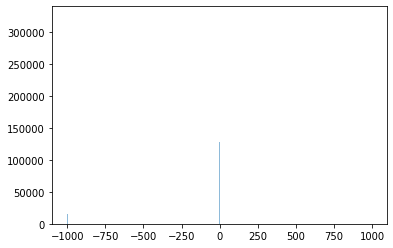

In [33]:
bins = np.arange(-1000, 1000, 5)
# plt.xlim([min(x)-5, max(x)+5])
plt.hist(x, bins=bins, alpha=0.5)

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 127949., 323702.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.]),
 array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
         -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
          10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
          65,   70,   75,   80,   85,   90,   95]),
 <BarContainer object of 39 artists>)

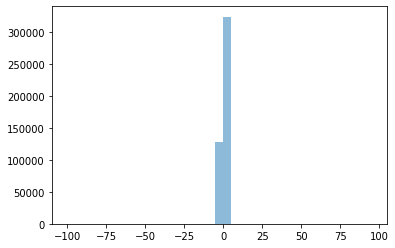

In [30]:
plt.hist(x, bins=bins, alpha=0.5)